KL(p1 || p2) = 1.6320739404025337
KL(p1 || p3) = 0.9420234630687356
KL(p1 || p2) <= KL(p1 || p3): False


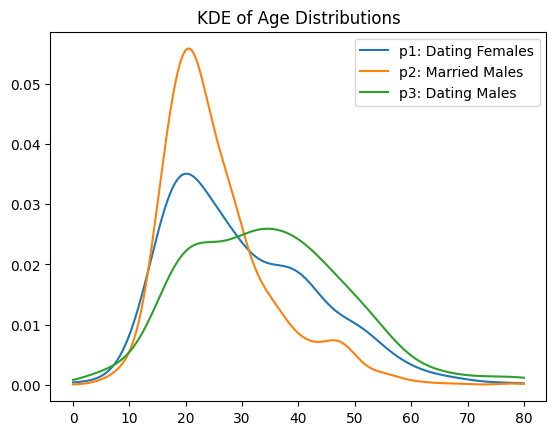

In [5]:
from scipy.stats import gaussian_kde
from scipy.integrate import quad
import matplotlib.pyplot as plt
import numpy as np
from numpy import exp as ē
from numpy import log as ln
from numpy import genfromtxt
from numpy import mean

# Load the datasets
X1 = genfromtxt('/Users/shreyas/Downloads/Age meeting a partner/age_met_dating_females.csv', delimiter=',')
X2 = genfromtxt('/Users/shreyas/Downloads/Age meeting a partner/age_met_married_males.csv', delimiter=',')
X3 = genfromtxt('/Users/shreyas/Downloads/Age meeting a partner/age_met_dating_males.csv', delimiter=',')

# Step 1: Apply Kernel Density Estimation to smooth the distributions
kde_1 = gaussian_kde(X1)
kde_2 = gaussian_kde(X2)
kde_3 = gaussian_kde(X3)

# Define the domain for the KDE
x_vals = np.linspace(0, 80, 1000)  # Assuming the age range is 0 to 80

# Calculate the KDE values for each distribution
p1_x = kde_1(x_vals)
p2_x = kde_2(x_vals)
p3_x = kde_3(x_vals)

# Step 2: Define KL divergence function
def kl_divergence(p, q):
    return np.sum(p * (ln(p) - ln(q)))

# Step 3: Calculate the KL divergences
kl_12 = kl_divergence(p1_x, p2_x)
kl_13 = kl_divergence(p1_x, p3_x)

# Step 4: Print the results
print(f"KL(p1 || p2) = {kl_12}")
print(f"KL(p1 || p3) = {kl_13}")
print(f"KL(p1 || p2) <= KL(p1 || p3): {kl_12 <= kl_13}")

# Step 5: Plot the distributions
plt.plot(x_vals, p1_x, label="p1: Dating Females")
plt.plot(x_vals, p2_x, label="p2: Married Males")
plt.plot(x_vals, p3_x, label="p3: Dating Males")
plt.title("KDE of Age Distributions")
plt.legend()
plt.show()
